<img src='./img/cams_header.png' alt='Logo EU Copernicus ECMWF' align='right' width='100%'></img>

<br>

# CAMS - Introduction to the European Air Quality Index (EAQI)

### About

This notebook provides you a practical introduction to the calculation and interpretation of the `Air Quality Index (AQI)` in Europe. Air pollution is the single largest environmental health risk in Europe, causing cardiovascular and respiratory diseases, that, in the most serious cases, lead to premature deaths.
The European Environment Agency's European Air Quality Index allows users to understand more about air quality where they live. Even though the air quality in Europe has improved over recent decades, the levels of air pollutants still exceed EU standards and the most stringent World Health Organization (WHO) guidelines.

#### How is the European Air Quality index defined?
The European Air Quality index is computed for five main pollutants regulated in the European legislation:
* `Ozone (O3)`
* `Nitrogen Dioxide (NO2)`
* `Sulphur Dioxide (SO2)`
* `Fine particulate matter with a diameter smaller than 2.5 micrometers (PM2.5)`
* `Fine particulate matter with a diameter smaller than 10 micrometers (PM10)`


The index ranges from 1 (good) to 6 (extremely poor). For each pollutant, the index is calculated separately according to the concentrations; the higher the concentrations, the higher the index (see Table below for index levels). The overall hourly European Air Quality index is simply defined as the highest value of the five individual pollutants indexes computed for the same hour. For instance, if the indices relative to O<sub>3</sub>, NO<sub>2</sub>, SO<sub>2</sub>, PM2.5 and PM10 are 1,3,1,2,2 respectively, the overall index will be 3. The overall daily European Air Quality index is the highest value of the overall hourly European Air Quality index in the corresponding day.



<img src='./img/eaqi_index_level.png' alt='European Air Quality Index' align='center' width='50%'></img>



<br>

The notebook has the following outline:

* [1 - Compute the European Air Quality Index for Europe for one day in July 2021](#eaqi_2dmap)
  * [1.1 - Request data from the ADS programmatically with the CDS API](#request_map)
  * [1.2 - Load and prepare the European air quality forecast data](#prepare_map)
  * [1.3 - Classify daily maximum pollutant values into European Air Quality Index levels](#classify_map)
  * [1.4 - Visualize a map of European Air Quality Index levels in Europe for 15 July 2021](#visualize_map)
* [2 - Calculate the daily European Air Quality Index for London in December 2020](#eaqi_ts)
  * [2.1 - Request data from the ADS programmatically with the CDS API](#request_ts)
  * [2.2 - Load and prepare the European air quality forecast data](#prepare_ts)
  * [2.3 - Select time-series information for London, UK and convert to a pandas dataframe](#select_ts)
  * [2.4 - Classify daily maximum values of key pollutants into European Air Quality Index levels](#classify_ts)
  * [2.5 - Visualize daily European Air Quality Index for London in December 2020 as heatmap](#visualize_ts)


### Data

This notebook introduces you to the [CAMS European air quality forecasts and analysis]((https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-europe-air-quality-forecasts?tab=overview)) dataset. The data has the following specifications:

> **Data**: `CAMS European air quality forecasts` <br>
> **Temporal coverage**: `three-year rolling archive` <br>
> **Temporal resolution**: `hourly` <br>
> **Spatial coverage**: `Europe` <br>
> **Spatial resolution**: `0.1° x 0.1°` <br>
> **Format**: `NetCDF`<br>


### How to access the notebook
* [**nbviewer**](https://nbviewer.org/github/ecmwf-projects/copernicus-training/blob/master/215_cams_european_air_quality_index.ipynb)
* [**Colab**](https://colab.research.google.com/github/ecmwf-projects/copernicus-training/blob/master/215_cams_european_air_quality_index.ipynb)
* [**Binder**](https://hub-binder.mybinder.ovh/user/ecmwf-projects--rnicus-training-ulg9z83u/lab/tree/215_cams_european_air_quality_index.ipynb)

### Further resources

* [Air pollution - European Environment Agency](https://www.eea.europa.eu/themes/air)
* [Europe's air quality status 2021](https://www.eea.europa.eu/publications/air-quality-status-2021/air-quality-status-briefing-2021)
* [Air pollution stil too high in most EU Member States](https://www.eea.europa.eu/highlights/air-pollution-still-too-high-1)
* [Euronews: Copernicus air quality index](https://www.euronews.com/weather/copernicus-air-quality-index)

<hr>

### Load libraries

In [7]:
# CDS API
import cdsapi
import os

# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr
import pandas as pd

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from matplotlib.colors import ListedColormap

from datetime import datetime

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import seaborn as sns

<hr>

## <a id='eaqi_2dmap'></a> 1. Compute the European Air Quality Index for Europe for one day in July 2021

As a first example, we want to compute and visualize the European Air Quality Index for Europe for on day in July 2021.

### <a id='request_map'></a> 1.1 Request data from the ADS programmatically with the CDS API

Let us request data from the Atmosphere Data Store programmatically with the help of the CDS API. We again set manually the CDS API credentials. First, you have to define two variables: `URL` and `KEY` which build together your CDS API key. Below, you have to replace the `#########` with your personal ADS key. Please find [here](https://ads.atmosphere.copernicus.eu/api-how-to) your personal ADS key.

In [5]:
URL = 'https://ads.atmosphere.copernicus.eu/api/v2'
KEY = '######################################'

<br>

The next step is then to request the data with the help of the CDS API. Below, we request analysis data from the `CAMS European air quality forecasts` dataset. We request hourly data for 15 July 2021 for the five main pollutants for which the European Air Quality Index is calculated: `nitrogen_dioxide`, `ozone`, `particulate_matter_10um`, `particulate_matter_2.5um` and `sulphur_dioxide`.

Let us store the dataset in the folder `./data/cams/eaqi/` under the name `20210715_eaqi_europe.nc`. First, let us make sure that the directory `./data/cams/eaqi/` already exists and if not, let us create the directory.

In [86]:
# define the name of the directory to be created
path = "./data/cams/eaqi"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed - Directory already available" % path)
else:
    print ("Successfully created the directory %s " % path)

Creation of the directory ./data/cams/eaqi failed - Directory already available


<br>

<a id='data_request_volcano'></a>Now, let us request the data.

In [ ]:
import cdsapi
c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'cams-europe-air-quality-forecasts',
    {
        'model': 'euradim',
        'date': '2021-07-15/2021-07-15',
        'format': 'netcdf',
        'type': 'analysis',
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'leadtime_hour': '0',
        'variable': [
            'nitrogen_dioxide', 'ozone', 'particulate_matter_10um',
            'particulate_matter_2.5um', 'sulphur_dioxide',
        ],
        'level': '0',
    },
    './data/cams/eaqi/20210715_eaqi_europe.nc')

<br>

### <a id='prepare_map'></a>1.2 Load and prepare the European air quality forecast data

The European air quality forecasts data are available either in `GRIB` or in `NetCDF` format. Above, we requested the data in the `NetCDF` format. You can use the Python library [xarray](http://xarray.pydata.org/en/stable/) and the function `open_dataset()` to load a NetCDF file as `xarray.Dataset`. A xarray Dataset is a collection of one or more variables that share the same dimensions. Below, you see that the Dataset has four dimensions, `latitude`, `level`, `longitude` and `time`, and five variables, `no2_conc`, `o3_conc`, `pm10_conc`, `pm2p5_conc` and `so2_conc`.

In [13]:
eaqi = xr.open_dataset('./data/cams/eaqi/20210715_eaqi_europe.nc')
eaqi

<xarray.Dataset>
Dimensions:     (latitude: 420, level: 1, longitude: 700, time: 24)
Coordinates:
  * longitude   (longitude) float32 335.0 335.1 335.2 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 71.95 71.85 71.75 71.65 ... 30.25 30.15 30.05
  * level       (level) float32 0.0
  * time        (time) timedelta64[ns] 00:00:00 01:00:00 ... 22:00:00 23:00:00
Data variables:
    no2_conc    (time, level, latitude, longitude) float32 ...
    o3_conc     (time, level, latitude, longitude) float32 ...
    pm10_conc   (time, level, latitude, longitude) float32 ...
    pm2p5_conc  (time, level, latitude, longitude) float32 ...
    so2_conc    (time, level, latitude, longitude) float32 ...
Attributes:
    title:        NO2/O3/PM10/PM25/SO2 Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by RIUUK
    source:       Data from EURAD-IM model
    history:      Model EURAD ANALYSIS
    ANALYSIS:     Europe, 20210715+[0H_23H]
    summary:      EURAD model hourly ANALYSIS of NO2/O3/PM10/PM25/SO2 concent...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

<br>

Let us inspect the coordinates of the dataset more in detail. You see above that the data set consists of 744 time steps and that the longitude values are on a [0, 360] grid. 

However, if you inspect the time dimension more in detail, you see that the time is given in nanoseconds [ns]. As a next step, let us convert the time information into a human-readable time format and bring the longitude coordinates to a [-180, 180] grid.

In [92]:
eaqi.time

<xarray.DataArray 'time' (time: 744)>
array([               0,    3600000000000,    7200000000000, ...,
       2667600000000000, 2671200000000000, 2674800000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 01:00:00 ... 30 days 23:00:00
Attributes:
    long_name:  ANALYSIS time from 20201201

First, from the `long_name` information of the time dimension (see above), we can retrieve the initial timestamp. With the function `strptime()` from Python's `datetime` library, we can convert it into a `datetime.datetime` object.

In [51]:
timestamp = eaqi.time.long_name[19:27]

timestamp_init=datetime.strptime(timestamp,'%Y%m%d' )
timestamp_init

datetime.datetime(2020, 12, 1, 0, 0)

In a next step, we then build a `DateTimeIndex` object with the help of Panda's `date_range()` function, making use of the length of the time dimension. The result is a `DateTimeIndex` object, which can be used to newly assign the time coordinate information.

In [52]:
time_coords = pd.date_range(timestamp_init, periods=len(eaqi.time), freq='1h').strftime("%Y-%m-%d %H:%M:%S").astype('datetime64[ns]')
time_coords

DatetimeIndex(['2020-12-01 00:00:00', '2020-12-01 01:00:00',
               '2020-12-01 02:00:00', '2020-12-01 03:00:00',
               '2020-12-01 04:00:00', '2020-12-01 05:00:00',
               '2020-12-01 06:00:00', '2020-12-01 07:00:00',
               '2020-12-01 08:00:00', '2020-12-01 09:00:00',
               ...
               '2020-12-31 14:00:00', '2020-12-31 15:00:00',
               '2020-12-31 16:00:00', '2020-12-31 17:00:00',
               '2020-12-31 18:00:00', '2020-12-31 19:00:00',
               '2020-12-31 20:00:00', '2020-12-31 21:00:00',
               '2020-12-31 22:00:00', '2020-12-31 23:00:00'],
              dtype='datetime64[ns]', length=744, freq=None)

And the last step is to assign the converted time information to the loaded xarray.Dataset `eaqi`, with the function `assign_coords()`.

In [11]:
eaqi_assigned = eaqi.assign_coords(time=time_coords)
eaqi_assigned

<xarray.Dataset>
Dimensions:     (latitude: 420, level: 1, longitude: 700, time: 24)
Coordinates:
  * longitude   (longitude) float32 335.0 335.1 335.2 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 71.95 71.85 71.75 71.65 ... 30.25 30.15 30.05
  * level       (level) float32 0.0
  * time        (time) datetime64[ns] 2021-07-15 ... 2021-07-15T23:00:00
Data variables:
    no2_conc    (time, level, latitude, longitude) float32 ...
    o3_conc     (time, level, latitude, longitude) float32 ...
    pm10_conc   (time, level, latitude, longitude) float32 ...
    pm2p5_conc  (time, level, latitude, longitude) float32 ...
    so2_conc    (time, level, latitude, longitude) float32 ...
Attributes:
    title:        NO2/O3/PM10/PM25/SO2 Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by RIUUK
    source:       Data from EURAD-IM model
    history:      Model EURAD ANALYSIS
    ANALYSIS:     Europe, 20210715+[0H_23H]
    summary:      EURAD model hourly ANALYSIS of NO2/O3/PM10/PM25/SO2 concent...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

<br>

Now, let us also re-assign the longitude values and shift the grid from [0,360] to [-180,180]. At the end, you might want to sort the longitude values in an ascending order. You can re-assign coordinate values with the xarray function `assign_coords()`.

In [12]:
eaqi_assigned = eaqi_assigned.assign_coords(longitude=(((eaqi_assigned.longitude + 180) % 360) - 180)).sortby('longitude')
eaqi_assigned

<xarray.Dataset>
Dimensions:     (latitude: 420, level: 1, longitude: 700, time: 24)
Coordinates:
  * longitude   (longitude) float32 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 71.95 71.85 71.75 71.65 ... 30.25 30.15 30.05
  * level       (level) float32 0.0
  * time        (time) datetime64[ns] 2021-07-15 ... 2021-07-15T23:00:00
Data variables:
    no2_conc    (time, level, latitude, longitude) float32 ...
    o3_conc     (time, level, latitude, longitude) float32 ...
    pm10_conc   (time, level, latitude, longitude) float32 ...
    pm2p5_conc  (time, level, latitude, longitude) float32 ...
    so2_conc    (time, level, latitude, longitude) float32 ...
Attributes:
    title:        NO2/O3/PM10/PM25/SO2 Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by RIUUK
    source:       Data from EURAD-IM model
    history:      Model EURAD ANALYSIS
    ANALYSIS:     Europe, 20210715+[0H_23H]
    summary:      EURAD model hourly ANALYSIS of NO2/O3/PM10/PM25/SO2 concent...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

<br>

Let us now also drop the dimension `level`, which only has one record, as we requested the data of the five key pollutants on the surface. The xarray function `squeeze()` drops all dimensions with only one entry. The result is a dataset with three dimensions: `latitude`, `longitude` and `time`.

In [16]:
eaqi_assigned = eaqi_assigned.squeeze(drop=True)

eaqi_assigned

<xarray.Dataset>
Dimensions:     (latitude: 420, longitude: 700, time: 24)
Coordinates:
  * longitude   (longitude) float32 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 71.95 71.85 71.75 71.65 ... 30.25 30.15 30.05
  * time        (time) datetime64[ns] 2021-07-15 ... 2021-07-15T23:00:00
Data variables:
    no2_conc    (time, latitude, longitude) float32 ...
    o3_conc     (time, latitude, longitude) float32 ...
    pm10_conc   (time, latitude, longitude) float32 ...
    pm2p5_conc  (time, latitude, longitude) float32 ...
    so2_conc    (time, latitude, longitude) float32 ...
Attributes:
    title:        NO2/O3/PM10/PM25/SO2 Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by RIUUK
    source:       Data from EURAD-IM model
    history:      Model EURAD ANALYSIS
    ANALYSIS:     Europe, 20210715+[0H_23H]
    summary:      EURAD model hourly ANALYSIS of NO2/O3/PM10/PM25/SO2 concent...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

<br>

In [17]:
eaqi_daily = eaqi_assigned.resample(time='1D').max()
eaqi_daily

<xarray.Dataset>
Dimensions:     (latitude: 420, longitude: 700, time: 1)
Coordinates:
  * time        (time) datetime64[ns] 2021-07-15
  * longitude   (longitude) float32 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 71.95 71.85 71.75 71.65 ... 30.25 30.15 30.05
Data variables:
    no2_conc    (time, latitude, longitude) float32 0.02787 0.02787 ... 3.931
    o3_conc     (time, latitude, longitude) float32 61.97 61.97 ... 124.9 125.3
    pm10_conc   (time, latitude, longitude) float32 0.7773 0.7773 ... 52.61
    pm2p5_conc  (time, latitude, longitude) float32 0.5984 0.5984 ... 30.76
    so2_conc    (time, latitude, longitude) float32 0.001265 0.001265 ... 22.91

<br>

### <a id='classify_map'></a> 1.3 Classify daily maximum pollutant values into European Air Quality Index levels

In [89]:
no2_limits = [0, 40, 90, 120, 230, 340, 1000]
ozone_limits = [0, 50, 100, 130, 240, 380, 800]
pm10_limits = [0, 10, 20, 25, 50, 75, 800]
pm25_limits = [0, 20, 40, 50, 100, 150, 1200]
so2_limits = [0, 100, 200, 350, 500, 750, 1250]

In [90]:
bin_list = [no2_limits, ozone_limits, pm10_limits, pm25_limits, so2_limits]
bin_list

[[0, 40, 90, 120, 230, 340, 1000],
 [0, 50, 100, 130, 240, 380, 800],
 [0, 10, 20, 25, 50, 75, 800],
 [0, 20, 40, 50, 100, 150, 1200],
 [0, 100, 200, 350, 500, 750, 1250]]

<br>

In [91]:
variable_list = list(eaqi_daily.variables)[3:]
variable_list

NameError: name 'eaqi_daily' is not defined

In [124]:
classified_arrays = []
for i in range(0,len(eaqi_daily)):
    variable = variable_list[i]
    temp = xr.apply_ufunc(np.digitize,
              eaqi_daily[variable],
              bin_list[i])
    classified_arrays.append(temp)

<xarray.Dataset>
Dimensions:     (latitude: 420, longitude: 700, time: 1)
Coordinates:
  * time        (time) datetime64[ns] 2021-07-15
  * longitude   (longitude) float32 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 71.95 71.85 71.75 71.65 ... 30.25 30.15 30.05
Data variables:
    no2_conc    (time, latitude, longitude) int64 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    o3_conc     (time, latitude, longitude) int64 2 2 2 2 2 2 2 ... 3 3 3 3 3 3
    pm10_conc   (time, latitude, longitude) int64 1 1 1 1 1 1 1 ... 4 4 4 4 5 5
    pm2p5_conc  (time, latitude, longitude) int64 1 1 1 1 1 1 1 ... 2 2 2 2 2 2
    so2_conc    (time, latitude, longitude) int64 1 1 1 1 1 1 1 ... 1 1 1 1 1 1

<br>

In [ ]:
combined = xr.merge(classified_arrays)
combined

<br>

In [175]:
final_index = combined.squeeze().to_array().max('variable')
final_index

<xarray.DataArray (latitude: 420, longitude: 700)>
array([[2, 2, 2, ..., 2, 1, 1],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 5, 5, 5],
       [2, 2, 2, ..., 5, 5, 5],
       [2, 2, 2, ..., 4, 5, 5]])
Coordinates:
    time       datetime64[ns] 2021-07-15
  * longitude  (longitude) float32 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude   (latitude) float32 71.95 71.85 71.75 71.65 ... 30.25 30.15 30.05

<br>

### <a id='visualize_map'></a>1.4 Visualize a map of European Air Quality Index levels in Europe for 15 July 2021

In [ ]:
cmap = ListedColormap(['#5AAA5F', '#A7D25C', '#ECD347', '#F5BE41', '#F09235', '#D93322'])
labels = ['Very good', 'Good', 'Medium', 'Poor', 'Very Poor', 'Extremely Poor']

Text(0.5, 1.0, 'test')

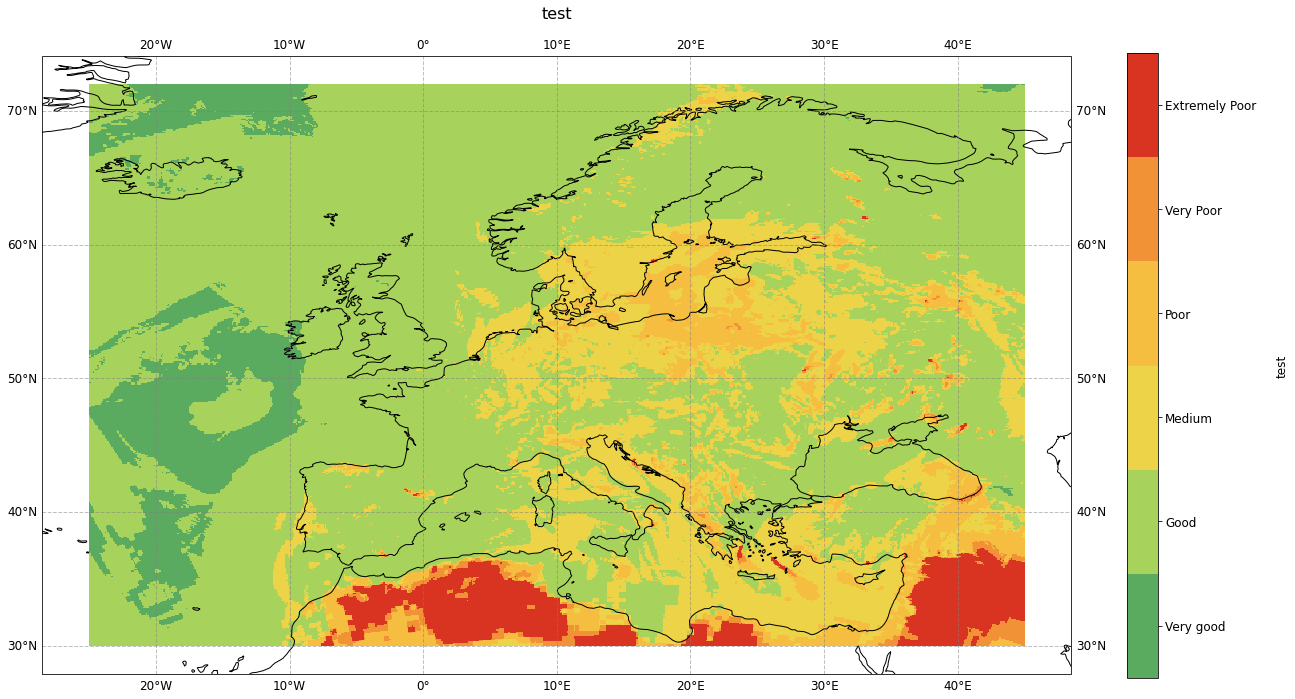

In [174]:

# Initiate a matplotlib figure
fig = plt.figure(figsize=(20,15))
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

img = plt.pcolormesh(test.longitude, test.latitude, 
                     test, cmap = cmap,
                label = labels)
#                cbar_kwargs={'fraction': 0.028,
#                             'pad':0.05,
#                            'label': '\nOzone thresholds'},)

# Define geographic extent of the map
#ax.set_extent([dust.longitude.min(),dust.longitude.max(),dust.latitude.min(),dust.latitude.max()], crs=ccrs.PlateCarree())

cbar = plt.colorbar(img,fraction=0.028, pad=0.05)
cbar.set_label('\ntest', fontsize=12)
cbar.ax.tick_params(labelsize=12)
cbar.set_ticks([1.5,2.5,3.5,4.5,5.5,6.5])
cbar.set_ticklabels(labels)

# Add additional features such as coastlines, grid and colorbar
ax.coastlines(color='black')
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style={'size':12}
gl.ylabel_style={'size':12}


# Set the title of the plot
ax.set_title('test', fontsize=16, pad=20.0)

<br>

## <a id='eaqi_ts'></a>2. Calculate the daily European Air Quality Index for London in December 2020

Next, we want to calculate the daily European Air Quality Index for London, UK in December 2020.

### <a id='request_ts'></a> 2.1 Request data from the ADS programmatically with the CDS API

Let us request data from the Atmosphere Data Store programmatically with the help of the CDS API. We again set manually the CDS API credentials. First, you have to define two variables: `URL` and `KEY` which build together your CDS API key. Below, you have to replace the `#########` with your personal ADS key. Please find [here](https://ads.atmosphere.copernicus.eu/api-how-to) your personal ADS key.

In [5]:
URL = 'https://ads.atmosphere.copernicus.eu/api/v2'
KEY = '######################################'

<br>

The next step is then to request the data with the help of the CDS API. Below, we request analysis data from the `CAMS European air quality forecasts` dataset. We request hourly data for December 2020 for the five main pollutants for which the European Air Quality Index is calculated: `nitrogen_dioxide`, `ozone`, `particulate_matter_10um`, `particulate_matter_2.5um` and `sulphur_dioxide`. In the data request below, we additionally set the `area` key, as we want to tailor the data request to only a small geographical area around London, United Kingdom.

Let us store the dataset in the folder `./data/cams/eaqi/` under the name `202012_eaqi_london.nc`. First, let us make sure that the directory `./data/cams/eaqi/` already exists and if not, let us create the directory.

In [12]:
# define the name of the directory to be created
path = "./data/cams/eaqi"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed - Directory already available" % path)
else:
    print ("Successfully created the directory %s " % path)

Creation of the directory ./data/cams/eaqi failed - Directory already available


<br>

<a id='data_request_volcano'></a>Now, let us request the data.

In [ ]:
c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
    'cams-europe-air-quality-forecasts',
    {
        'model': 'euradim',
        'date': '2020-12-01/2020-12-31',
        'format': 'netcdf',
        'type': 'analysis',
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'leadtime_hour': '0',
        'variable': [
            'nitrogen_dioxide', 'ozone', 'particulate_matter_10um',
            'particulate_matter_2.5um', 'sulphur_dioxide',
        ],
        'area': [51.6, -0.3, 51.3, 0],
        'level': '0',
    },
    './data/cams/eaqi/202012_eaqi_london.nc')

<br>

### <a id='prepare_ts'></a>2.2 Load and prepare the European air quality forecast data

The European air quality forecasts data are available either in `GRIB` or in `NetCDF` format. Above, we requested the data in the `NetCDF` format. You can use the Python library [xarray](http://xarray.pydata.org/en/stable/) and the function `open_dataset()` to load a NetCDF file as `xarray.Dataset`. A xarray Dataset is a collection of one or more variables that share the same dimensions. Below, you see that the Dataset has four dimensions, `latitude`, `level`, `longitude` and `time`, and five variables, `no2_conc`, `o3_conc`, `pm10_conc`, `pm2p5_conc` and `so2_conc`.

In [15]:
eaqi_london = xr.open_dataset('./data/cams/eaqi/202012_eaqi_london.nc')
eaqi_london

<xarray.Dataset>
Dimensions:     (latitude: 3, level: 1, longitude: 3, time: 744)
Coordinates:
  * longitude   (longitude) float32 359.8 359.9 360.0
  * latitude    (latitude) float32 51.55 51.45 51.35
  * level       (level) float32 0.0
  * time        (time) timedelta64[ns] 00:00:00 01:00:00 ... 30 days 23:00:00
Data variables:
    no2_conc    (time, level, latitude, longitude) float32 ...
    o3_conc     (time, level, latitude, longitude) float32 ...
    pm10_conc   (time, level, latitude, longitude) float32 ...
    pm2p5_conc  (time, level, latitude, longitude) float32 ...
    so2_conc    (time, level, latitude, longitude) float32 ...
Attributes:
    title:        NO2/O3/PM10/PM25/SO2 Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by RIUUK
    source:       Data from EURAD-IM model
    history:      Model EURAD ANALYSIS
    ANALYSIS:     Europe, 20201201-20201231+[0H_23H]
    summary:      EURAD model hourly ANALYSIS of NO2/O3/PM10/PM25/SO2 concent...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

<br>

Let us inspect the coordinates of the dataset more in detail. You see above that the data set consists of 744 time steps and that the longitude values are on a [0, 360] grid. 

However, if you inspect the time dimension more in detail, you see that the time is given in nanoseconds [ns]. As a next step, let us convert the time information into a human-readable time format and bring the longitude coordinates to a [-180, 180] grid.

In [44]:
eaqi_london.time

<xarray.DataArray 'time' (time: 744)>
array([               0,    3600000000000,    7200000000000, ...,
       2667600000000000, 2671200000000000, 2674800000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 01:00:00 ... 30 days 23:00:00
Attributes:
    long_name:  ANALYSIS time from 20201201

First, from the `long_name` information of the time dimension (see above), we can retrieve the initial timestamp. With the function `strptime()` from Python's `datetime` library, we can convert it into a `datetime.datetime` object.

In [51]:
timestamp = eaqi_london.time.long_name[19:27]

timestamp_init=datetime.strptime(timestamp,'%Y%m%d' )
timestamp_init

datetime.datetime(2020, 12, 1, 0, 0)

In a next step, we then build a `DateTimeIndex` object with the help of Panda's `date_range()` function, making use of the length of the time dimension. The result is a `DateTimeIndex` object, which can be used to newly assign the time coordinate information.

In [52]:
time_coords = pd.date_range(timestamp_init, periods=len(eaqi_london.time), freq='1h').strftime("%Y-%m-%d %H:%M:%S").astype('datetime64[ns]')
time_coords

DatetimeIndex(['2020-12-01 00:00:00', '2020-12-01 01:00:00',
               '2020-12-01 02:00:00', '2020-12-01 03:00:00',
               '2020-12-01 04:00:00', '2020-12-01 05:00:00',
               '2020-12-01 06:00:00', '2020-12-01 07:00:00',
               '2020-12-01 08:00:00', '2020-12-01 09:00:00',
               ...
               '2020-12-31 14:00:00', '2020-12-31 15:00:00',
               '2020-12-31 16:00:00', '2020-12-31 17:00:00',
               '2020-12-31 18:00:00', '2020-12-31 19:00:00',
               '2020-12-31 20:00:00', '2020-12-31 21:00:00',
               '2020-12-31 22:00:00', '2020-12-31 23:00:00'],
              dtype='datetime64[ns]', length=744, freq=None)

And the last step is to assign the converted time information to the loaded xarray.Dataset `eaqi_ldn_ts`, with the function `assign_coords()`.

In [53]:
eaqi_london = eaqi_london.assign_coords(time=time_coords)
eaqi_london

<xarray.Dataset>
Dimensions:     (latitude: 3, level: 1, longitude: 3, time: 744)
Coordinates:
  * longitude   (longitude) float32 359.8 359.9 360.0
  * latitude    (latitude) float32 51.55 51.45 51.35
  * level       (level) float32 0.0
  * time        (time) datetime64[ns] 2020-12-01 ... 2020-12-31T23:00:00
Data variables:
    no2_conc    (time, level, latitude, longitude) float32 15.51 10.58 ... 46.72
    o3_conc     (time, level, latitude, longitude) float32 37.22 36.29 ... 1.924
    pm10_conc   (time, level, latitude, longitude) float32 9.667 10.13 ... 19.78
    pm2p5_conc  (time, level, latitude, longitude) float32 8.624 9.112 ... 18.0
    so2_conc    (time, level, latitude, longitude) float32 2.99 3.44 ... 11.16
Attributes:
    title:        NO2/O3/PM10/PM25/SO2 Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by RIUUK
    source:       Data from EURAD-IM model
    history:      Model EURAD ANALYSIS
    ANALYSIS:     Europe, 20201201-20201231+[0H_23H]
    summary:      EURAD model hourly ANALYSIS of NO2/O3/PM10/PM25/SO2 concent...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

Now, let us also re-assign the longitude values and shift the grid from [0,360] to [-180,180]. At the end, you might want to sort the longitude values in an ascending order. You can re-assign coordinate values with the xarray function `assign_coords()`.

In [54]:
eaqi_london_assigned = eaqi_london.assign_coords(longitude=(((eaqi_london.longitude + 180) % 360) - 180)).sortby('longitude')
eaqi_london_assigned

<xarray.Dataset>
Dimensions:     (latitude: 3, level: 1, longitude: 3, time: 744)
Coordinates:
  * longitude   (longitude) float32 -0.25 -0.15 -0.04999
  * latitude    (latitude) float32 51.55 51.45 51.35
  * level       (level) float32 0.0
  * time        (time) datetime64[ns] 2020-12-01 ... 2020-12-31T23:00:00
Data variables:
    no2_conc    (time, level, latitude, longitude) float32 15.51 10.58 ... 46.72
    o3_conc     (time, level, latitude, longitude) float32 37.22 36.29 ... 1.924
    pm10_conc   (time, level, latitude, longitude) float32 9.667 10.13 ... 19.78
    pm2p5_conc  (time, level, latitude, longitude) float32 8.624 9.112 ... 18.0
    so2_conc    (time, level, latitude, longitude) float32 2.99 3.44 ... 11.16
Attributes:
    title:        NO2/O3/PM10/PM25/SO2 Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by RIUUK
    source:       Data from EURAD-IM model
    history:      Model EURAD ANALYSIS
    ANALYSIS:     Europe, 20201201-20201231+[0H_23H]
    summary:      EURAD model hourly ANALYSIS of NO2/O3/PM10/PM25/SO2 concent...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

Let us now also drop the dimension `level`, which only has one record, as we requested the data of the five key pollutants on the surface. The xarray function `squeeze()` drops all dimensions with only one entry. The result is a dataset with three dimensions: `latitude`, `longitude` and `time`.

In [55]:
eaqi_london_assigned = eaqi_london_assigned.squeeze(drop=True)
eaqi_london_assigned

<xarray.Dataset>
Dimensions:     (latitude: 3, longitude: 3, time: 744)
Coordinates:
  * longitude   (longitude) float32 -0.25 -0.15 -0.04999
  * latitude    (latitude) float32 51.55 51.45 51.35
  * time        (time) datetime64[ns] 2020-12-01 ... 2020-12-31T23:00:00
Data variables:
    no2_conc    (time, latitude, longitude) float32 15.51 10.58 ... 49.02 46.72
    o3_conc     (time, latitude, longitude) float32 37.22 36.29 ... 2.409 1.924
    pm10_conc   (time, latitude, longitude) float32 9.667 10.13 ... 19.35 19.78
    pm2p5_conc  (time, latitude, longitude) float32 8.624 9.112 ... 17.46 18.0
    so2_conc    (time, latitude, longitude) float32 2.99 3.44 ... 10.33 11.16
Attributes:
    title:        NO2/O3/PM10/PM25/SO2 Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by RIUUK
    source:       Data from EURAD-IM model
    history:      Model EURAD ANALYSIS
    ANALYSIS:     Europe, 20201201-20201231+[0H_23H]
    summary:      EURAD model hourly ANALYSIS of NO2/O3/PM10/PM25/SO2 concent...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

<br>

### <a id='select_ts'></a>2.3 Select time-series information for London, UK and convert to a pandas dataframe

The xarray.Datset above is now in a format that allows us to select the values of the pollutants for one single grid point. Let us first define variables for the latitude and longitude coordinates for London, United Kingdom. These two variables can then be used to select the values for one single grid point. You can use xarray's function `sel()` to make a coordinate-based selection. Let us set the keyword argument `method='nearest'`, which selects the information that belongs to the closest grid point to the provided latitude and longitude inputs.

The resulting dataset remains with `time` as the only dimension.

In [56]:
london_lat = 51.5
london_lon = -0.1

eaqi_ldn_ts = eaqi_london_assigned.sel(latitude=london_lat, longitude=london_lon, method='nearest')
eaqi_ldn_ts

<xarray.Dataset>
Dimensions:     (time: 744)
Coordinates:
    longitude   float32 -0.04999
    latitude    float32 51.55
  * time        (time) datetime64[ns] 2020-12-01 ... 2020-12-31T23:00:00
Data variables:
    no2_conc    (time) float32 18.17 13.55 10.95 11.06 ... 40.85 38.69 35.76
    o3_conc     (time) float32 37.4 47.85 51.77 51.07 ... 14.49 14.36 16.66
    pm10_conc   (time) float32 10.22 8.573 7.056 6.757 ... 19.02 20.79 21.28
    pm2p5_conc  (time) float32 9.175 7.65 6.211 5.926 ... 16.62 18.21 18.54
    so2_conc    (time) float32 3.667 3.03 2.836 2.631 ... 9.585 9.668 8.872
Attributes:
    title:        NO2/O3/PM10/PM25/SO2 Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by RIUUK
    source:       Data from EURAD-IM model
    history:      Model EURAD ANALYSIS
    ANALYSIS:     Europe, 20201201-20201231+[0H_23H]
    summary:      EURAD model hourly ANALYSIS of NO2/O3/PM10/PM25/SO2 concent...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

<br>

Our aim is to compute the daily European Air Quality Index for London for every day in December 2020. Hence, as a next step we want to resample the hourly data to a daily resolution. As resample function, we use `max()`, which selects for every key pollutant the maximum value per day. You can use the function `resample()` to aggregated the hourly information to daily maximum values. The result is a decrease of the time dimension entries from 744 to 31, one entry for every day in December 2020.

In [57]:
eaqi_lnd_ts_daily = eaqi_ldn_ts.resample(time='1D').max()
eaqi_lnd_ts_daily

<xarray.Dataset>
Dimensions:     (time: 31)
Coordinates:
  * time        (time) datetime64[ns] 2020-12-01 2020-12-02 ... 2020-12-31
    longitude   float32 -0.04999
    latitude    float32 51.55
Data variables:
    no2_conc    (time) float64 36.3 65.69 70.01 66.55 ... 65.24 84.48 52.93
    o3_conc     (time) float64 51.77 24.67 49.51 77.38 ... 32.98 23.57 20.49
    pm10_conc   (time) float64 22.57 50.78 28.98 17.73 ... 41.05 36.28 33.25
    pm2p5_conc  (time) float64 20.82 47.19 26.39 16.21 ... 37.79 32.32 29.52
    so2_conc    (time) float64 8.053 41.21 48.89 18.53 ... 24.58 39.45 15.31

<br>

Above, the xarray.Dataset holds the daily time-series information for London for the five main pollutants. The Python library [pandas](https://pandas.pydata.org/) is very effective in handling time-series data and offers an interface to xarray. Let us convert the xarray.Dataset above to a pandas.Dataframe with the function `to_dataframe()`. The result is a dataframe with 31 row entries and seven columns, including longitude and latitude information as well as the maximum daily values for each main pollutant.

In [58]:
eaqi_ts_daily_df = eaqi_lnd_ts_daily.to_dataframe()
eaqi_ts_daily_df

,longitude,latitude,no2_conc,o3_conc,pm10_conc,pm2p5_conc,so2_conc
time,,,,,,,
2020-12-01,-0.049988,51.549999,36.302994,51.769108,22.570601,20.822241,8.053405
2020-12-02,-0.049988,51.549999,65.689880,24.665340,50.784946,47.194412,41.210457
2020-12-03,-0.049988,51.549999,70.011467,49.512947,28.976664,26.391684,48.893467
2020-12-04,-0.049988,51.549999,66.551270,77.376938,17.728424,16.214790,18.532803
2020-12-05,-0.049988,51.549999,47.045738,55.204777,19.833015,18.252777,9.049898
2020-12-06,-0.049988,51.549999,36.376804,31.806337,27.090300,24.144947,8.827726
2020-12-07,-0.049988,51.549999,57.133705,19.878513,42.652412,40.137554,21.683035
2020-12-08,-0.049988,51.549999,57.631012,7.215853,43.279716,40.599648,25.114105
2020-12-09,-0.049988,51.549999,64.777512,32.255619,32.228062,29.394268,31.417585


<br>

### <a id='classify_ts'></a> 2.4 Classify daily maximum values of key pollutants into European Air Quality Index levels

The next step is now to classify the daily maximum values into the respective European Air Quality Index levels. The EAQI has six index levels and different tresholds for each of the five key pollutants. First, we define the limits for each pollutant and define additional a list with the index class labels 1 to 6.

In [62]:
ozone_limits = [0, 50, 100, 130, 240, 380, 800]
no2_limits = [0, 40, 90, 120, 230, 340, 1000]
so2_limits = [0, 100, 200, 350, 500, 750, 1250]
pm25_limits = [0, 20, 40, 50, 100, 150, 1200]
pm10_limits = [0, 10, 20, 25, 50, 75, 800]

index_levels = [1, 2, 3, 4, 5, 6]

<br>

Based on the thresholds above, we now classify the daily maximum values of each pollutant into the respective European Air Quality Index level. The pandas function `cut()` allows us to categorize the daily maximum values into index levels. The function takes the following keyword arguments:
* pandas.Series for each pollutant, which shall be categorized
* list of thresholds for each pollutant
* list with index labels

As a result, for each pollutant, the daily maximum value has been classified into one of the six index level classes, based on the pollutant thresholds.

In [69]:
ozone = pd.cut(eaqi_ts_daily_df['o3_conc'], ozone_limits , labels = index_levels)
no2 = pd.cut(eaqi_ts_daily_df['no2_conc'], no2_limits , labels = index_levels)
so2 = pd.cut(eaqi_ts_daily_df['so2_conc'], so2_limits , labels = index_levels)
pm25 = pd.cut(eaqi_ts_daily_df['pm2p5_conc'], pm25_limits , labels = index_levels)
pm10 = pd.cut(eaqi_ts_daily_df['pm10_conc'], pm10_limits , labels = index_levels)

<br>

In a next step, we want to bring together the categorized pandas.Series objects above into one pandas.DataFrame. For this, we can use the constructor `pd.DataFrame()` and combine the five pandas.Series objects into one dataframe.

In [73]:
df = pd.DataFrame(dict(o3 = ozone, no2 = no2, so2 = so2, pm25=pm25, pm10=pm10))

,o3,no2,so2,pm25,pm10
time,,,,,
2020-12-01,2,1,1,2,3
2020-12-02,1,2,1,3,5
2020-12-03,1,2,1,2,4
2020-12-04,2,2,1,1,2
2020-12-05,2,2,1,1,2
2020-12-06,1,1,1,2,4
2020-12-07,1,2,1,3,4
2020-12-08,1,2,1,3,4
2020-12-09,1,2,1,2,4


<br>

The last step before we can visualize the European Air Quality Index levels is to compute the overal index level based on the five pollutants. The overal index level for each day is defined by the pollutant with the highest level. Below, with the function `max()`, we select the maximum index level for each day and define a new column with the name `level`.

In [74]:
df['level'] = df.max(axis=1).astype(int)
df

,o3,no2,so2,pm25,pm10,level
index,,,,,,
2020-12-01,2,1,1,2,3,3
2020-12-02,1,2,1,3,5,5
2020-12-03,1,2,1,2,4,4
2020-12-04,2,2,1,1,2,2
2020-12-05,2,2,1,1,2,2
2020-12-06,1,1,1,2,4,4
2020-12-07,1,2,1,3,4,4
2020-12-08,1,2,1,3,4,4
2020-12-09,1,2,1,2,4,4


<br>

### <a id='visualize_ts'></a> 2.5 Visualize daily European Air Quality Index for London in December 2020 as heatmap

The last step is now to visualize the daily European Air Quality Index for London in December 2020 as heatmap. We can us the function `heatmap()` from the seaborn library to create a heatmap with days on the horizontal axis and the pollutants as well as the overall index level on the vertical axis. This representation allows a quick interpretation on the overall index level for every day. It further allows you to identify the determining pollutant for every day.

For the `heatmap()` function, we need to transpose the dataframe, so that the key pollutants and overall index level are given as row entries and we have for every day in December 2020 a column entry. Additionally, with `iloc[::-1]`, we want to revert the sequence of the pollutants, as we want to visualize the overall index level on top.

In [75]:
df = (df.T).iloc[::-1]
df

index,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
level,3,5,4,2,2,4,4,4,4,2,...,4,2,2,3,2,2,4,4,4,4
pm10,3,5,4,2,2,4,4,4,4,2,...,4,2,1,3,2,2,4,4,4,4
pm25,2,3,2,1,1,2,3,3,2,1,...,2,1,1,1,1,1,2,2,2,2
so2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
no2,1,2,2,2,2,1,2,2,2,2,...,2,2,1,2,2,2,2,2,2,2
o3,2,1,1,2,2,1,1,1,1,1,...,2,2,2,2,2,2,1,1,1,1


The transpose function converts `NaN` values to a large negative number. For this reason, we have to set negative entries again as `NaN` (not  a number).

In [84]:
df[df<0] = np.nan
df

index,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
level,3,5,4,2,2,4,4,4,4,2,...,4,2,2,3,2,2,4,4,4,4
pm10,3,5,4,2,2,4,4,4,4,2,...,4,2,1,3,2,2,4,4,4,4
pm25,2,3,2,1,1,2,3,3,2,1,...,2,1,1,1,1,1,2,2,2,2
so2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
no2,1,2,2,2,2,1,2,2,2,2,...,2,2,1,2,2,2,2,2,2,2
o3,2,1,1,2,2,1,1,1,1,1,...,2,2,2,2,2,2,1,1,1,1


<br>

And now, we can finally visualize the heatmap. The code below has five main parts:
* **1. Initiatie the matplotlib figure**: Initiate a figure and axes objects and add a colorbar
* **2. Plotting function**: Plot the pandas dataframe with the heatmap() function from the seaborn library
* **3. Set title of the heatmap**: Set a title to the resulting heatmap
* **4. Customize x- and y-axis ticks and labels:** Customize the x- and y-labels for correct representation of the data
* **5. Customize colorbar entries:** Customize the labels of the colorbar and indicate the index levels from 'very good' to 'extremely poor'

**Note:** before plotting, we additionally define a customized colormap based on the official EAQI index colors. We also add additionally the labels to the six EAQI index levels, which range from 'very good' to 'Extremely poor'.

In [85]:
cmap = ListedColormap(['#5AAA5F', '#A7D25C', '#ECD347', '#F5BE41', '#F09235', '#D93322'])
cmap

labels = ['Very good', 'Good', 'Medium', 'Poor', 'Very Poor', 'Extremely Poor']

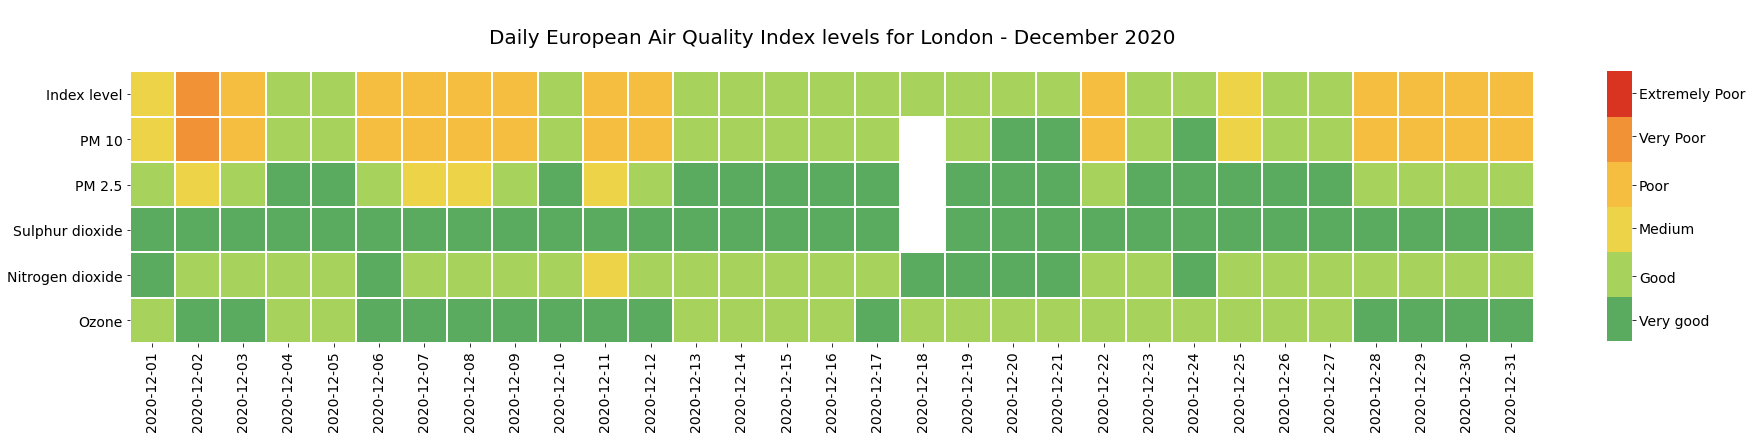

In [83]:
# Initiate the matplotlib figure
fig, ax = plt.subplots(1,1,figsize=(35,5))
cbar_ax = fig.add_axes([.82, .13, .01, .75])

# Plotting function
g = sns.heatmap(df, cmap=cmap, linewidth=1, linecolor='w', square=True, cbar_ax = cbar_ax,vmin=1, vmax=6, ax=ax)


# Set title of the heatmap
g.set_title("\nDaily European Air Quality Index levels for London - December 2020\n", fontsize=20)
g.set(xlabel=None)

# Customize x- and y-axis ticks and labels
ylabels=['Index level', 'PM 10', 'PM 2.5', 'Sulphur dioxide', 'Nitrogen dioxide', 'Ozone']
g.set_yticklabels(ylabels,fontsize=14, rotation=0)

xlabels=df.columns.format('%Y-%m-%d')[1::]
g.set_xticklabels(xlabels, fontsize=14)

# Customize colorbar entries
cbar = ax.collections[0].colorbar
cbar.set_ticks([1.4,2.2,3.1,3.9,4.8,5.6])
cbar.set_ticklabels(['Very good', 'Good', 'Medium', 'Poor', 'Very Poor', 'Extremely Poor'])
cbar.ax.tick_params(labelsize=14)


<br>

<hr>

<p><img src='./img/copernicus_logo.png' align='right' alt='Logo EU Copernicus' width='20%'></img></p>
<br><br><br><br><br>
<span style='float:right'><p style=\"text-align:right;\">This project is licensed under <a href="./LICENSE">APACHE License 2.0</a>. | <a href=\"https://github.com/ecmwf-projects/copernicus-training">View on GitHub</a></span>